In [1]:
import torch
import torch.nn as nn
from sinabs import to_nir
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class NonSeq(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        self.fc1 = nn.Linear(100, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc4 = nn.Linear(50, 50)
        self.fc5 = nn.Linear(50, 2)

    def forward(self, x):

        out1 = self.fc1(x)
        out2 = self.fc2(out1)
        out3 = self.fc3(out2)
        out4 = self.fc4(out3 + out2)
        out5 = self.fc5(out4)

        return out5

ann = NonSeq()


In [3]:
ann_graph = [
    ('input', 'fc1'),
    ('fc1', 'fc2'),
    ('fc2', 'fc3'),
    ('fc2', 'fc4'),
    ('fc3', 'fc4'),
    ('fc4', 'fc5'),
    ('fc5', 'output'),
]

print(len(ann_graph))

7


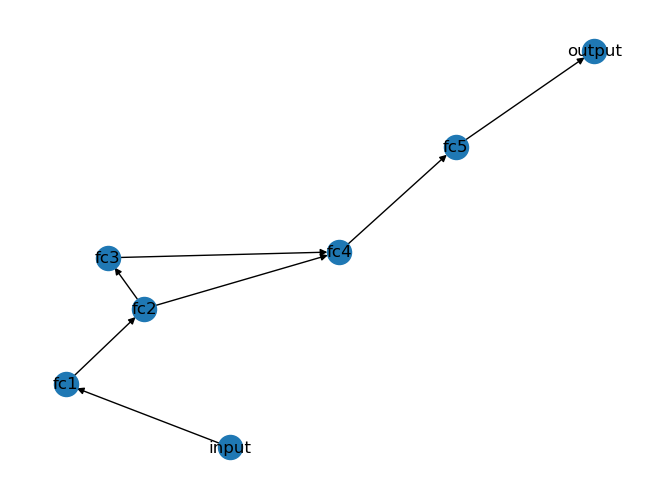

In [4]:
g_ideal = nx.DiGraph(ann_graph)
nx.draw(g_ideal, with_labels = True)
plt.show()

In [5]:
nir_graph = to_nir(ann, torch.randn(1, 100))

source_node: Tensor_0(1, 100) (inp)
destination_node: fc1 (inp)

source_node: fc1 (out)
destination_node: Tensor_1(1, 50) (out)

source_node: Tensor_1(1, 50) (inp)
destination_node: fc2 (inp)

source_node: fc2 (out)
destination_node: Tensor_2(1, 50) (out)

source_node: Tensor_2(1, 50) (inp)
destination_node: fc3 (inp)

source_node: fc3 (out)
destination_node: Tensor_3(1, 50) (out)

source_node: Tensor_4(1, 50) (inp)
destination_node: fc4 (inp)

source_node: fc4 (out)
destination_node: Tensor_5(1, 50) (out)

source_node: Tensor_5(1, 50) (inp)
destination_node: fc5 (inp)

source_node: fc5 (out)
destination_node: Tensor_6(1, 2) (out)

***************************
source_node: fc1 ()
destination_node: fc2 ()

source_node: fc2 ()
destination_node: fc3 ()

source_node: fc4 ()
destination_node: fc5 ()

-------------extract_nir_graph_v2(extract_torch_graph()) (wrong)---------------
```mermaid
graph TD;
fc1 --> fc2;
fc2 --> fc3;
fc3;
fc4 --> fc5;
fc5;

```
 <class 'nirtorch.graph.Graph'>
-------

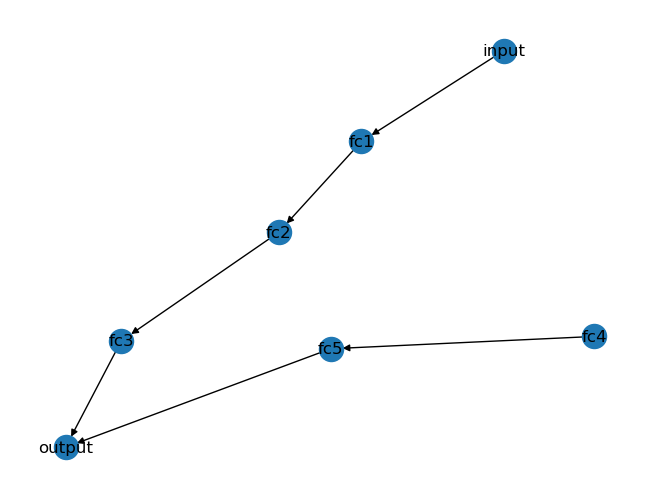

In [6]:
g_nir = nx.DiGraph(nir_graph.edges)
nx.draw(g_nir, with_labels = True)
plt.show()